In [2]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

# use transformers to translate the text above from german into english
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-de-en")

model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-de-en")

In [3]:
df = pd.read_csv('diga.csv')
df.head()

,app_name,developer_info,website_info,app_status,start_date,end_date,app_description,indication_codes,indication_names,price,property_values
0,CANKADO PRO-React Onco,"CANKADO GmbH, Deutschland",partners.cankado.com/about/,vorläufig aufgenommen,03.05.2021,02.05.2023,PRO-React Onco ist eine Web- und App-basierte ...,C50,Bösartige Neubildung der Brustdrüse Mamma,399.84,"Keine Zusatzgeräte, Vertragsärztliche Leistung..."
1,Cara Care für Reizdarm,"HiDoc Technologies GmbH, Deutschland",cara.care/de/about/,vorläufig aufgenommen,26.12.2021,25.11.2023,Cara Care für Reizdarm ist eine digitale Gesun...,"K58, K58.1, K58.2, K58.3, K58.8","Reizdarmsyndrom, Reizdarmsyndrom, Diarrhoe-prä...",718.20,"Keine Zusatzgeräte, Keine vertragsärztlichen L..."
2,companion patella powered by medi - proved by ...,"PrehApp GmbH, Deutschland",prehapp.de,vorläufig aufgenommen,04.10.2021,03.03.2023,companion patella powered by medi - proved by ...,"M22.2, M22.4, M76.5, M79.66, S83.0","Krankheiten im Patellofemoralbereich, Chondrom...",345.10,"Keine Zusatzgeräte, Vertragsärztliche Leistung..."
3,deprexis,"GAIA AG, Deutschland",gaia-group.com/de/,Dauerhaft aufgenommen,NaN,NaN,deprexis ist ein interaktives onlinebasiertes ...,"F32.0, F32.1, F32.2, F33.0, F33.1, F33.2","Leichte depressive Episode, Mittelgradige depr...",210.00,"Keine Zusatzgeräte, Keine vertragsärztlichen L..."
4,edupression.com®,"SOFY GmbH, Österreich",edupression.com/,vorläufig aufgenommen,26.12.2022,25.08.2023,Die DiGA edupression.com® besteht aus dem Medi...,"F32.0, F32.1, F33.0, F33.1","Leichte depressive Episode, Mittelgradige depr...",178.50 - 357.00,"Keine Zusatzgeräte, Keine vertragsärztlichen L..."


The Indication Code (ICD code) is a globally recognized system that is used to consistently label medical diagnoses. ICD stands for “International Statistical Classification of Diseases and Related Health Problems”.

In [4]:
# print the total number of apps
print("Total number of apps in the dataset = ", len(df))
# print the total number of unique developers
print("Total number of unique developers in the dataset = ", len(df['developer_info'].unique()))

Total number of apps in the dataset =  37
Total number of unique developers in the dataset =  27


<AxesSubplot:title={'center':'Top 5 Developer Info'}>

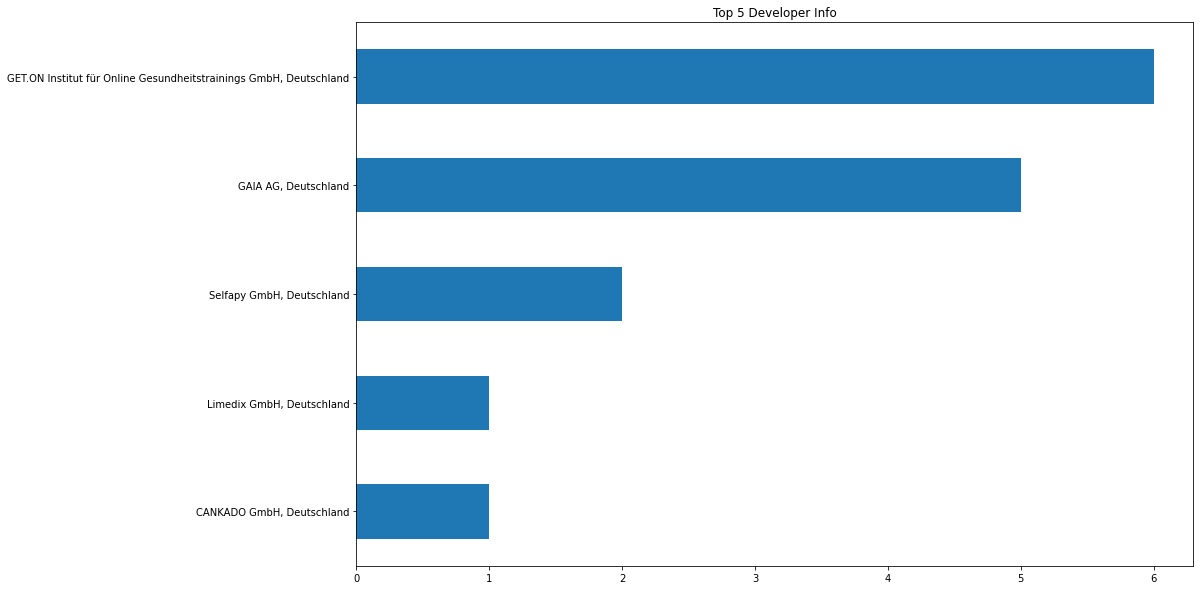

In [5]:
df['developer_info'].value_counts().head(5).sort_values(ascending=True).plot(kind='barh', figsize=(15,10), title='Top 5 Developer Info')

<AxesSubplot:>

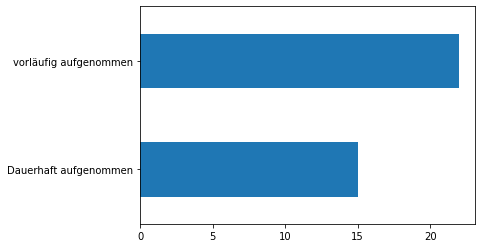

In [6]:
# visualize the total count of app statuses
df['app_status'].value_counts().sort_values(ascending=True).plot(kind='barh')

The average price = 435.9467567567567
Min = 119.0
Min = 952.0
Min = 449.0


<AxesSubplot:>

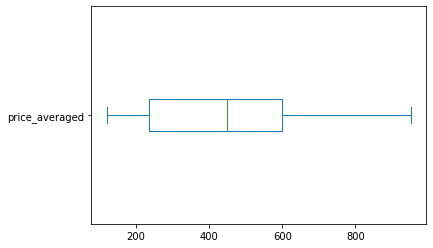

In [7]:
## visualize the average price of all apps
# convert price to float
# if df['price'] contains -, calculate the mean by taking the average of the two numbers
df['price_averaged'] = df['price'].str.replace(' ', '')
df['price_averaged'] = df['price_averaged'].str.replace('-', ' ')
df['price_averaged'] = df['price_averaged'].str.split(' ')
df['price_averaged'] = df['price_averaged'].apply(lambda x: (float(x[0]) + float(x[1]))/2 if len(x) > 1 else float(x[0]))
print(f'The average price = {df["price_averaged"].mean()}')
# calcuated the min and max price
print(f'Min = {df["price_averaged"].min()}')
print(f'Min = {df["price_averaged"].max()}')
print(f'Min = {df["price_averaged"].median()}')
# visualize a boxplot of the prices (middle line is the median)
df['price_averaged'].plot(kind='box', vert=False) 

In [8]:
# select all individual indication codes
indication_codes = df['indication_codes'].str.split(',').tolist()
counts = [len(sublist) for sublist in indication_codes]


indication_codes = [item for sublist in indication_codes for item in sublist]
# remove empty spaces
indication_codes = [x.strip() for x in indication_codes]
# remove duplicates
indication_codes_unique = list(set(indication_codes))
# print the total number of indication codes
print(f'The total number of covered indications is: {len(indication_codes)} different indications')

The total number of covered indications is: 112 different indications


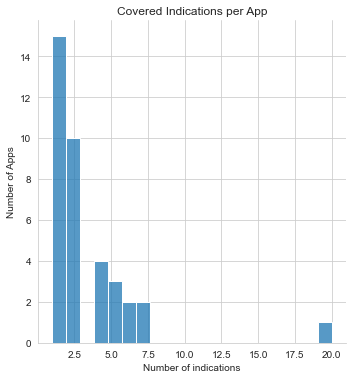

In [9]:
# visualize the distribution of the number of indication codes per app
sns.set_style("whitegrid")

# plot boxplot
gfg = sns.displot(data=counts, kde=False, rug=False, bins=20)

# add label to the axis and label to the plot
gfg.set(xlabel ="Number of indications", ylabel = "Number of Apps", title ='Covered Indications per App')


In [10]:
# select the app with the most indication codes
df[df['indication_codes'].str.split(',').str.len().max() == df['indication_codes'].str.split(',').str.len()]

,app_name,developer_info,website_info,app_status,start_date,end_date,app_description,indication_codes,indication_names,price,property_values,price_averaged
34,Vivira,"Vivira Health Lab GmbH, Deutschland",www.vivira.com,Dauerhaft aufgenommen,NaN,NaN,Die DiGA Vivira ist eine durch das BfArM endgü...,"M42.0, M42.1, M42.9, M53.2, M53.8, M53.9, M54....","Juvenile Osteochondrose der Wirbelsäule, Osteo...",239.96,"Keine Zusatzgeräte, Vertragsärztliche Leistung...",239.96


In [11]:
indication_text_max = df[df['indication_codes'].str.split(',').str.len().max() == df['indication_codes'].str.split(',').str.len()].indication_names.values
indication_text_max[0]

'Juvenile Osteochondrose der Wirbelsäule, Osteochondrose der Wirbelsäule beim Erwachsenen, Osteochondrose der Wirbelsäule, nicht näher bezeichnet, Instabilität der Wirbelsäule, Sonstige näher bezeichnete Krankheiten der Wirbelsäule und des Rückens, Krankheit der Wirbelsäule und des Rückens, nicht näher bezeichnet, Lumboischialgie, Kreuzschmerz, Schmerzen im Bereich der Brustwirbelsäule, Sonstige Rückenschmerzen, Rückenschmerzen, nicht näher bezeichnet, Segmentale und somatische Funktionsstörungen: Thorakalbereich thorakolumbal, Segmentale und somatische Funktionsstörungen: Lumbalbereich lumbosakral, Segmentale und somatische Funktionsstörungen: Sakralbereich sakrokokzygeal, sakroiliakal, Sonstige biomechanische Funktionsstörungen: Thorakalbereich thorakolumbal, Sonstige biomechanische Funktionsstörungen: Lumbalbereich lumbosakral, Sonstige biomechanische Funktionsstörungen: Sakralbereich sakrokokzygeal, sakroiliakal, Biomechanische Funktionsstörung, nicht näher bezeichnet: Thorakalbere

In [12]:
max_indications_list = [i for i in indication_text_max[0].split(',')]
# tokenize the text
tokenized_text = tokenizer(max_indications_list, padding=True, truncation=True, return_tensors="pt")

#translate the text
translated_text = model.generate(**tokenized_text)

# decode the text
translated_text = tokenizer.batch_decode(translated_text, skip_special_tokens=True)

In [13]:
print(translated_text)

['Juvenile osteochondrosis of the spine', 'Osteochondrosis of the spine in adults', 'Osteochondrosis of the spine', 'Not specified', 'Instability of the spine', 'Other more detailed diseases of the spine and back', 'Disease of the spine and back', 'Not specified', 'Lumboischialgia', 'Cross pain', 'Chest vertebra pain', 'Other back pain', 'Back pain', 'Not specified', 'Segmental and somatic dysfunction: thoracal range thorakolumbal', 'Segmental and somatic dysfunction: Lumbal area lumbosacral', 'Segmental and somatic dysfunctions: sacral area sacrococzygeal', 'sacroiliakal', 'Other biomechanical dysfunctions: thoracal range thoracolumbal', 'Other biomechanical dysfunctions: Lumbal area lumbosacral', 'Other biomechanical dysfunctions: sacral area sacrococcygeal', 'sacroiliakal', 'Biomechanical dysfunction', 'not specified: thoracal range thorakolumbal', 'Biomechanical dysfunction', 'not specified: Lumbal area lumbosacral', 'Biomechanical dysfunction', 'not specified: sacral area sacrococ

[nltk_data] Downloading package stopwords to /Users/lsacy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


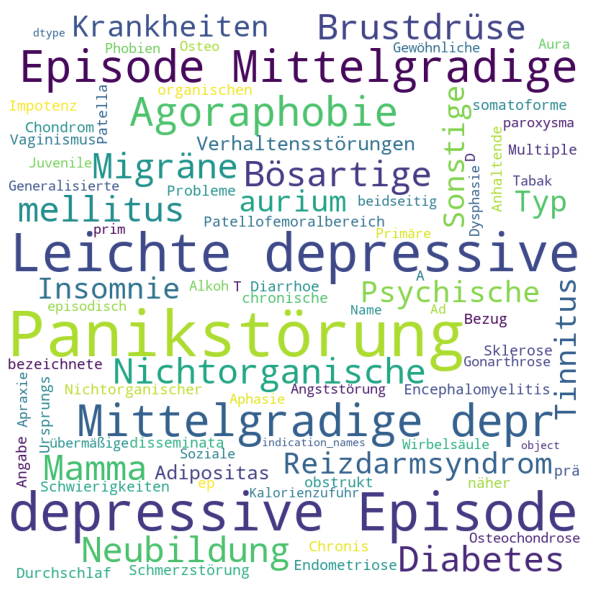

In [14]:
# draw a wordcloud
from nltk.corpus import stopwords
nltk.download('stopwords')

from wordcloud import WordCloud

stopwords = stopwords.words('german')

wordcloud = WordCloud(stopwords=stopwords, width = 800, height = 800, 
                background_color ='white',
                min_font_size = 10).generate(str(df['indication_names']))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [15]:
indications_text_full = df['indication_names'].values
indications_text_full = [i for i in indications_text_full]

In [16]:
# translate df['indication_names'] into english
# tokenize the text
tokenized_text = tokenizer(indications_text_full, padding=True, truncation=True, return_tensors="pt")

#translate the text
translated_text = model.generate(**tokenized_text, num_beams=4, early_stopping=True, max_length=512)

# decode the text
translated_text_full = tokenizer.batch_decode(translated_text, skip_special_tokens=True)
translated_text = ','.join(translated_text_full)

In [17]:
# add the translated text to the dataframe
df['indication_names_translated'] = translated_text_full

In [18]:
app_description = df['app_description'].values
app_description = [i for i in app_description]

In [19]:
# translate app_description into english
# tokenize the text
tokenized_text = tokenizer(app_description, padding=True, truncation=True, return_tensors="pt")

#translate the text
translated_text = model.generate(**tokenized_text, num_beams=4, early_stopping=True, max_length=512)


# decode the text
translated_text_full = tokenizer.batch_decode(translated_text, skip_special_tokens=True)
translated_text = ','.join(translated_text_full)

In [20]:
df['app_description_translated'] = translated_text_full
#

In [21]:
# save the dataframe
df.to_csv('diga_translated.csv', index=False)

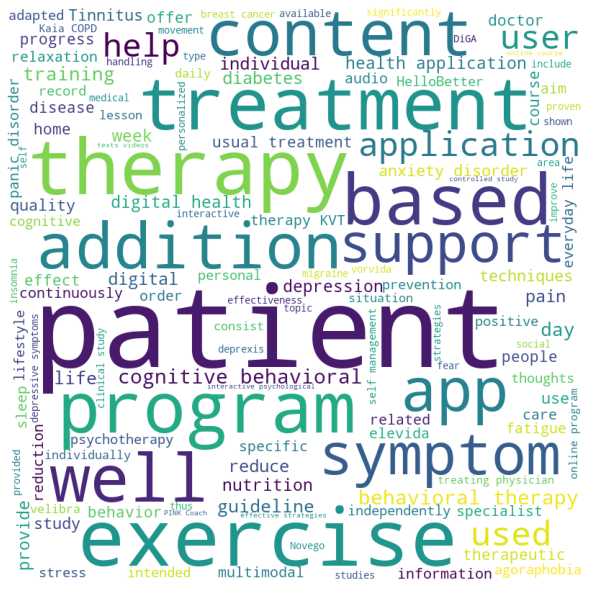

In [22]:
# create wordcloud on decoded_text2
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(translated_text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


In [23]:
# count the values of the indication codes
indication_codes = df['indication_codes'].str.split(',').tolist()
indication_codes = [item for sublist in indication_codes for item in sublist]
# remove empty spaces
indication_codes = [x.strip() for x in indication_codes]
# count the number of occurences of each indication code
from collections import Counter
indication_codes_count = Counter(indication_codes)
indication_codes_count

# select the top 10 indication codes 
top5 = indication_codes_count.most_common(5)

In [24]:
most_wanted_indications = []
for i in top5:
    i = i[0]
    # select the first app with the indication code
    app = df[df['indication_codes'].str.contains(i)].iloc[0]
    # find the index of the indication code
    index = [x.strip() for x in app['indication_codes'].split(',')].index(i)
    # find the indication_names for the indication code
    indication_name = app['indication_names'].split(',')[index]
    # add the indication name to the a list 
    most_wanted_indications.append(indication_name)
print(f'the top 5 most wanted indications are: \n{most_wanted_indications}')

the top 5 most wanted indications are: 
['Leichte depressive Episode', ' Mittelgradige depressive Episode', ' Rezidivierende depressive Störung', ' gegenwärtig leichte Episode', ' Panikstörung episodisch paroxysmale Angst']


In [25]:

# tokenize the text
tokenized_text = tokenizer(most_wanted_indications, padding=True, truncation=True, return_tensors="pt")

#translate the text
translated_text = model.generate(**tokenized_text, max_length=100, num_beams=4, early_stopping=True)

# decode the text
most_wanted_indications_eng = tokenizer.batch_decode(translated_text, skip_special_tokens=True)


In [26]:
print(f'the top 5 most wanted indications:')
for i in range(len(most_wanted_indications_eng)):
    print(f'{most_wanted_indications_eng[i]} with a total of - {top5[i][1]} apps -')

the top 5 most wanted indications:
Slightly depressive episode with a total of - 5 apps -
Middle Depressive Episode with a total of - 5 apps -
Recurrent depressive disorder with a total of - 5 apps -
at present light episode with a total of - 5 apps -
Panic disorder Episodic paroxysmal anxiety with a total of - 4 apps -


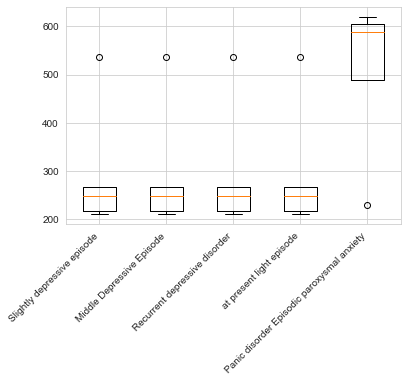

[535.49] ['elona therapy Depression']
[535.49] ['elona therapy Depression']
[535.49] ['elona therapy Depression']
[535.49] ['elona therapy Depression']
[230.] ['velibra']


In [27]:
apps_list = []
for i in top5:
    i = i[0]
    # select the first app with the indication code
    apps = df[df['indication_codes'].str.contains(i)]
    # add the apps to the list
    apps_list.append([apps['price_averaged']])

# get the values of a series apps_list[0][0]
apps_cost = [i[0].values for i in apps_list]
# visualize a list of boxplots
fig, ax = plt.subplots()
# 
bp = ax.boxplot(apps_cost)
ax.set_xticklabels(most_wanted_indications_eng, rotation=45, ha='right')
plt.show()
for outlier_path in bp['fliers']:
    outlier_data = outlier_path.get_data()[1]
    name = df[df['price_averaged'] == outlier_data[0]].app_name.values
    print(outlier_data, name)


In [28]:
df[df['app_name'] == 'elona therapy Depression']

,app_name,developer_info,website_info,app_status,start_date,end_date,app_description,indication_codes,indication_names,price,property_values,price_averaged,indication_names_translated,app_description_translated
6,elona therapy Depression,"Elona Health GmbH, Deutschland",www.elona.health,vorläufig aufgenommen,26.12.2022,25.12.2023,elona therapy Depression ist die digitale Gesu...,"F32.0, F32.1, F32.2, F33.0, F33.1, F33.2, F34.1","Leichte depressive Episode, Mittelgradige depr...",535.49,"Keine Zusatzgeräte, Vertragsärztliche Leistung...",535.49,"Mild depressive episode, moderate depressive e...",elona therapy Depression is the digital health...


In [29]:
df[df['app_name'] == 'velibra']

,app_name,developer_info,website_info,app_status,start_date,end_date,app_description,indication_codes,indication_names,price,property_values,price_averaged,indication_names_translated,app_description_translated
32,velibra,"GAIA AG, Deutschland",gaia-group.com/de/,Dauerhaft aufgenommen,NaN,NaN,velibra ist ein webbasiertes Programm für Pati...,"F40.01, F40.1, F41.0, F41.1","Agoraphobie: Mit Panikstörung, Soziale Phobien...",230.00,"Keine Zusatzgeräte, Keine vertragsärztlichen L...",230.0,"Agoraphobia: With panic disorder, social phobi...",velibra is a web-based program for patients wi...


In [30]:
# lowest price for the top1 indication code
indication1 = top5[0][0]
# choose the app with the highest price for the indication
sorted_df = df[df['indication_codes'].str.contains(indication1)].sort_values(by='price_averaged', ascending=True)
# show only the first, fourth and last column

sorted_df[['app_name', 'app_status', 'price_averaged', 'indication_codes']]

,app_name,app_status,price_averaged,indication_codes
3,deprexis,Dauerhaft aufgenommen,210.00,"F32.0, F32.1, F32.2, F33.0, F33.1, F33.2"
28,Selfapys Online-Kurs bei Depression,Dauerhaft aufgenommen,217.18,"F32.0, F32.1, F33.0, F33.1"
23,Novego: Depressionen bewältigen,vorläufig aufgenommen,249.00,"F32.0, F32.1, F33.0, F33.1, F34.1"
4,edupression.com®,vorläufig aufgenommen,267.75,"F32.0, F32.1, F33.0, F33.1"
6,elona therapy Depression,vorläufig aufgenommen,535.49,"F32.0, F32.1, F32.2, F33.0, F33.1, F33.2, F34.1"


In [31]:
df = pd.read_csv('diga_translated.csv')
# take each row with app_name, developer_info, indication_codes, indication_names, app_description
df_ger = df[['indication_names']]

# create a dictionary with row index as key and all the other columns as values as a single value
df_dict = df_ger.T.to_dict('list')
# do the same with the english version
df_en = df [['indication_names_translated']]

# create a dictionary with row index as key and all the other columns as values as a single value
df_dict_en = df_en.T.to_dict('list')

In [32]:
indication_names_eng = list(df_en['indication_names_translated'].values)
indication_names_ger = list(df_ger['indication_names'].values)

ind_eng = [i.split(',') for i in indication_names_eng]
ind_ger = [i.split(',') for i in indication_names_ger]
ind_eng = [item for sublist in ind_eng for item in sublist]
ind_ger = [item for sublist in ind_ger for item in sublist]
ind_eng = [x.strip() for x in ind_eng]
ind_ger = [x.strip() for x in ind_ger]
ind_eng = list(set(ind_eng))
ind_ger = list(set(ind_ger))

In [33]:
"""
This is a simple application for sentence embeddings: clustering

Sentences are mapped to sentence embeddings and then agglomerative clustering with a threshold is applied.
"""
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np

embedder = SentenceTransformer('all-MiniLM-L6-v2')

# Corpus with example sentences
corpus = ind_eng
corpus_embeddings = embedder.encode(corpus)

# Normalize the embeddings to unit length
corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

# Perform kmean clustering
clustering_model = AgglomerativeClustering(n_clusters=None, distance_threshold=1.5) #, affinity='cosine', linkage='average', distance_threshold=0.4)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []

    clustered_sentences[cluster_id].append(corpus[sentence_id])
# create an empty dataframe with columns 'cluster id' and 'indication names'
df_cluster = pd.DataFrame(columns=['cluster id', 'indication names'])
for i, cluster in clustered_sentences.items():
    df_cluster = df_cluster.append({'cluster id': i, 'indication names': cluster}, ignore_index=True)

# sort the df_cluster by the cluster id, drop the index and set cluster id as index
df_cluster = df_cluster.sort_values(by='cluster id').reset_index(drop=True).set_index('cluster id')
# show the dataframe df_cluster in a table format
df_cluster.style.set_properties(**{'text-align': 'left'})


,indication names
cluster id,
0,"['Agoraphobia: With panic disorder', 'Agoraphobia', 'panic disorder episodic paroxysmal anxiety', 'social phobia', 'Social phobias', 'generalized anxiety disorder', 'Generalised anxiety disorder', 'Agoraphobia: Without indication of panic disorder']"
1,"['intermediate depressive episode', 'moderate depressive episode', 'recurrent depressive disorder', 'currently moderate episode', 'severe depressive episode without psychotic symptoms', 'Mild depressive episode', 'currently mild episode', 'currently severe episode without psychotic symptoms']"
2,"['Malignant neuformation of the mamma breast', 'Problems related to difficulties in managing life', 'dysphasia and aphasia', 'Multiple sclerosis Encephalomyelitis disseminate']"
3,"['Irritable bowel syndrome', 'Diarrhoea-predominant RDS-D', 'Other and unspecified Irritable bowel syndrome', 'Irritable bowel syndrome with changing (mixed) stool habits RDS-M', 'Obstipation-predominant RDS-O']"
4,"['Fibromyalgia', 'pain in extremities: lower leg fibula', 'lumboischialgia', 'knee joint', 'Endometriosis']"
5,"['other biomechanical dysfunctions: thoracal range thoracolumbal', 'not specified: thoracal range thoracolumbal', 'other biomechanical dysfunctions: lumbal area lumbosacral', 'pain in the area of the thoracic spine', 'segmental and somatic dysfunctions: thoracic area thoracolumbal', 'segmental and somatic dysfunctions: lumbal area lumbosacral', 'biomechanical dysfunction']"
6,"['sacroilial', 'other biomechanical dysfunctions: sacrococcygeal', 'sacrociliacal', 'segmental and somatic dysfunctions: sacral area sacrococcygeal']"
7,"['Other posttraumatic gonarthrosis', 'gonarthrosis', 'Other secondary gonarthrosis', 'Primary gonarthrosis', 'Posttraumatic gonarthrosis', 'Other primary gonarthrosis']"
8,"['Other chronic pain', 'Sustained somatoform pain disorder', 'cross pain', 'Chronic uncontrollable pain', 'Chronic pain disorder with somatic and psychological factors']"


In [34]:
# reduce each entry in the corpus to three words maximum
corpus_reduced = [i.split(' ')[:3] for i in corpus]
# join the words with a space
corpus_reduced = [' '.join(i) for i in corpus_reduced]

['sacroilial',
 'both sides',
 'non-mechanical area of',
 'Diseases of Patella',
 'Other chronic pain',
 'other biomechanical dysfunctions:',
 'Agoraphobia: With panic',
 'type 1',
 'instability of the',
 'Other more detailed',
 'intermediate depressive episode',
 'obesity due to',
 'non-mechanical',
 'Irritable bowel syndrome',
 'Other posttraumatic gonarthrosis',
 'not specified: thoracal',
 'moderate depressive episode',
 'Patellofemoral diseases',
 'Migraine with aura',
 'other biomechanical dysfunctions:',
 'Agoraphobia',
 'Malignant neuformation of',
 'chronic obstructive lung',
 'Sustained somatoform pain',
 'gonarthrosis',
 'aprixia',
 'osteochondrosis of the',
 'Impotence of organic',
 'recurrent depressive disorder',
 'panic disorder episodic',
 'Non-organic dyspareunia',
 'Problems related to',
 'cross pain',
 'patella tendon tendinitis',
 'Migraine without aura',
 'pain in the',
 'social phobia',
 'Diabetes mellitus',
 'dysphasia and aphasia',
 'disease of the',
 'tibia',
 

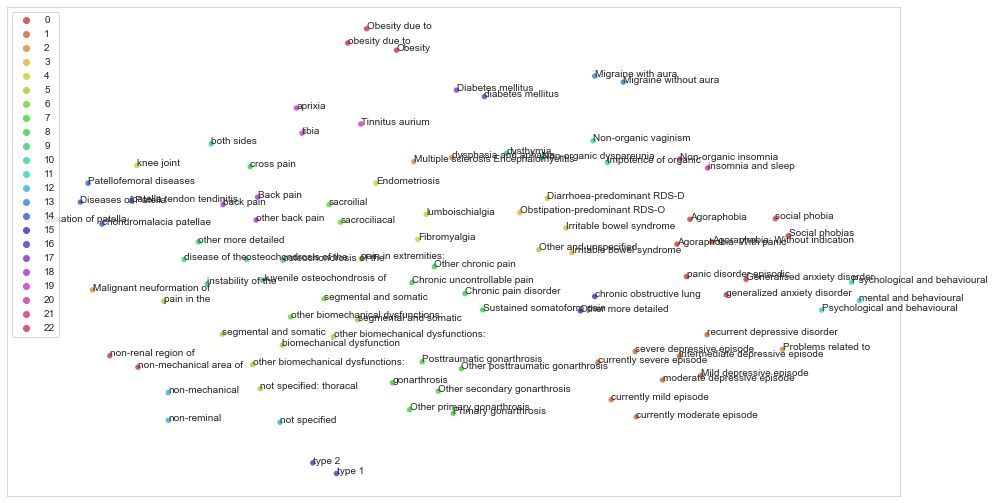

In [36]:
# visualize the clusters
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns

# Reduce it to two components with TSNE
X = TSNE(n_components=2).fit_transform(corpus_embeddings)

# Plot the solution
plt.figure(figsize=(16,9))
plt.xticks([])
plt.yticks([])

# Remove grid lines
plt.grid(visible=False)

ax = sns.scatterplot(X[:,0], X[:,1], hue=cluster_assignment, palette=sns.color_palette("hls", len(set(cluster_assignment))))
for i, txt in enumerate(corpus_reduced):

    ax.annotate(txt, (X[i,0], X[i,1]))

plt.show()
# ignore the warnings
